In [ ]:
print("hi")

hi


In [5]:
from scipy.stats import t

# Inputs
alpha = 0.05  # Significance level
beta = 0.2    # Type II error rate (1 - Power = 0.8)
df = 9       # Degrees of freedom (e.g., N-1 where N=10)

# Critical T-values
t_alpha_2 = t.ppf(1 - alpha / 2, df)  # Two-tailed test
t_beta = t.ppf(1 - beta, df)          # One-tailed test

print(f"T_alpha/2: {t_alpha_2:.3f}, T_beta: {t_beta:.3f}")


T_alpha/2: 2.262, T_beta: 0.883


# Bayesian Approach

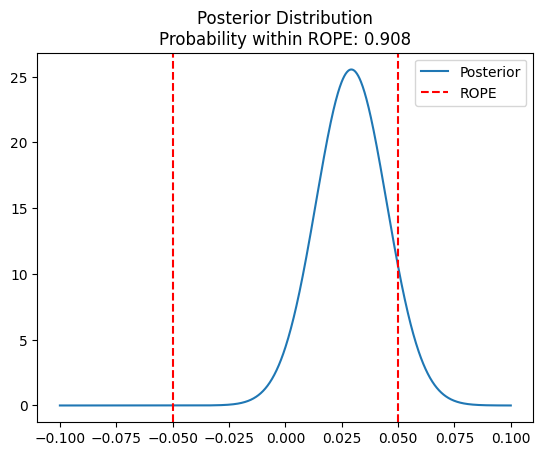

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
rope = [-0.05, 0.05]  # Region of practical equivalence
prior_mean = 0        # Prior mean
prior_sd = 0.1        # Prior standard deviation
obs_mean = 0.03       # Observed mean difference
obs_sd = 0.05 / np.sqrt(10)  # Standard error (sigma / sqrt(n))

# Posterior parameters
posterior_mean = (prior_mean / prior_sd**2 + obs_mean / obs_sd**2) / (1 / prior_sd**2 + 1 / obs_sd**2)
posterior_sd = np.sqrt(1 / (1 / prior_sd**2 + 1 / obs_sd**2))

# Evaluate posterior within ROPE
x = np.linspace(-0.1, 0.1, 1000)
posterior = norm.pdf(x, posterior_mean, posterior_sd)
prob_within_rope = norm.cdf(rope[1], posterior_mean, posterior_sd) - norm.cdf(rope[0], posterior_mean, posterior_sd)

# Plot
plt.plot(x, posterior, label="Posterior")
plt.axvline(rope[0], color='red', linestyle='--', label="ROPE")
plt.axvline(rope[1], color='red', linestyle='--')
plt.title(f"Posterior Distribution\nProbability within ROPE: {prob_within_rope:.3f}")
plt.legend()
plt.show()


Equivalence Test

In [ ]:
from scipy.stats import norm

# Inputs
mu_diff = 0.02  # Observed mean difference in Dice scores (T1xFLAIR - T1-CE)
std_diff = 0.03  # Standard deviation of the differences
rope = [0.95, 1.00]  # ROPE for equivalence

# Compute probabilities within ROPE
prob_within_rope = norm.cdf(rope[1], loc=mu_diff, scale=std_diff) - norm.cdf(rope[0], loc=mu_diff, scale=std_diff)

print(f"Probability within ROPE: {prob_within_rope:.3f}")


Baycomp 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
T1xFLAIR vs T1-CE Probability within ROPE: ((1.5894909261597312e-07, 0.049824374449616404, 0.9501754666012909), <Figure size 640x480 with 1 Axes>)
T1 vs T1-CE Probability within ROPE: ((5.041468190226209e-10, 1.9390504093497185e-05, 0.9999806089917597), <Figure size 640x480 with 1 Axes>)
T1xFLAIR vs T1 Probability within ROPE: ((0.8114843848157526, 0.18851535156680554, 2.63617441875752e-07), <Figure size 640x480 with 1 Axes>)


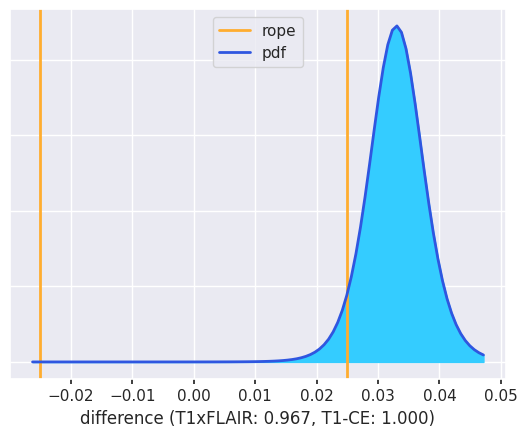

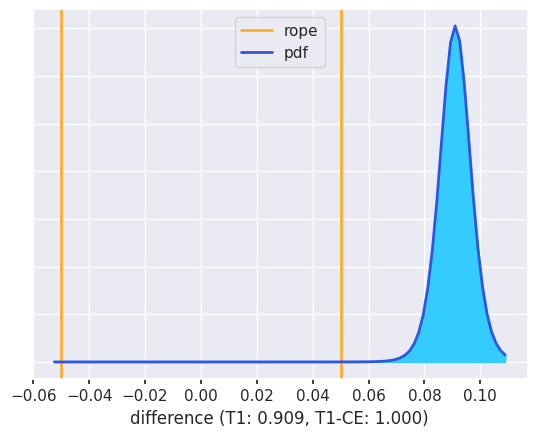

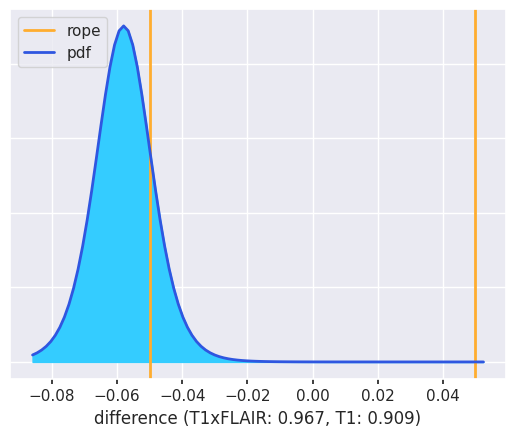

In [1]:
%pip install baycomp
import baycomp
import numpy as np

# Example Dice scores
scores_T1xFLAIR = np.array([0.97, 0.96, 0.98, 0.95, 0.97, 0.96, 0.98, 0.97, 0.96, 0.97])  # T1xFLAIR vs T1-CE
scores_T1 = np.array([0.91, 0.92, 0.90, 0.93, 0.91, 0.89, 0.90, 0.92, 0.91, 0.90])        # T1 vs T1-CE

# Define ROPE (Region of Practical Equivalence)
rope_T1xFLAIR = 0.025 # Narrow around high dice
rope_T1 = 0.05       # Slightly wider 

names_T1xFLAIR = ("T1xFLAIR", "T1-CE")
names_T1 = ("T1", "T1-CE")
names_T1xFLAIR_vs_T1 = ("T1xFLAIR", "T1")

# Bayesian analysis
prob_T1xFLAIR = baycomp.two_on_single(scores_T1xFLAIR, np.ones(len(scores_T1xFLAIR)), rope=rope_T1xFLAIR, plot=True, names=names_T1xFLAIR)
prob_T1 = baycomp.two_on_single(scores_T1, np.ones(len(scores_T1)), rope=rope_T1, plot=True, names=names_T1)
prob_T1xFLAIR_vs_T1 = baycomp.two_on_single(scores_T1xFLAIR, scores_T1, rope=rope_T1, plot=True, names=names_T1xFLAIR_vs_T1)

# Results
print(f"T1xFLAIR vs T1-CE Probability within ROPE: {prob_T1xFLAIR}")
print(f"T1 vs T1-CE Probability within ROPE: {prob_T1}")
print(f"T1xFLAIR vs T1 Probability within ROPE: {prob_T1xFLAIR_vs_T1}")
